<a href="https://colab.research.google.com/github/shutaro110/TomatoApp/blob/master/finetuning_sentence_transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

In [ ]:
DIR         = '/content/drive/MyDrive/colab/sentence_transformers/'
SOURCE_FILE = 'ldcc-20140209.tar.gz'
TARGET_FILE = 'livedoor/'

# データの用意

## データのダウンロード

### ライブドアニュースのデータのDL

データを読み込んだ後は、解凍させる データのDL自体はコマンドを使った方がラクなので、"wget"コマンドでDLする。

DLしたデータはtar.gz形式で圧縮されているので、それを解凍する必要があるので、"tarfile"ライブラリを使って、解凍している。

In [ ]:
# tar.gzファイルの解凍のためのライブラリのインポート
import tarfile

In [ ]:
# データのDL

!wget "https://www.rondhuit.com/download/ldcc-20140209.tar.gz"

--2023-07-31 00:38:04--  https://www.rondhuit.com/download/ldcc-20140209.tar.gz
Resolving www.rondhuit.com (www.rondhuit.com)... 59.106.19.174
Connecting to www.rondhuit.com (www.rondhuit.com)|59.106.19.174|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8855190 (8.4M) [application/x-gzip]
Saving to: ‘ldcc-20140209.tar.gz’

ldcc-20140209.tar.g 100%[===================>]   8.44M  3.66MB/s    in 2.3s    

2023-07-31 00:38:07 (3.66 MB/s) - ‘ldcc-20140209.tar.gz’ saved [8855190/8855190]



In [ ]:
# ファイルの解凍

tar = tarfile.open(SOURCE_FILE, 'r:gz')
tar.extractall(TARGET_FILE)

In [ ]:
# フォルダのファイルとディレクトリを確認
files_folders = [name for name in os.listdir("livedoor/text/")]
print(files_folders)

# カテゴリーのフォルダのみを抽出
categories = [name for name in os.listdir(
    "livedoor/text/") if os.path.isdir("livedoor/text/"+name)]
print(categories)

['smax', 'CHANGES.txt', 'peachy', 'kaden-channel', 'topic-news', 'dokujo-tsushin', 'sports-watch', 'README.txt', 'it-life-hack', 'movie-enter', 'livedoor-homme']
['smax', 'peachy', 'kaden-channel', 'topic-news', 'dokujo-tsushin', 'sports-watch', 'it-life-hack', 'movie-enter', 'livedoor-homme']


In [ ]:
# ファイルの中身を確認してみる
file_name = "livedoor/text/movie-enter/movie-enter-6255260.txt"

with open(file_name) as text_file:
    text = text_file.readlines()
    print("0：", text[0])  # URL情報
    print("1：", text[1])  # タイムスタンプ
    print("2：", text[2])  # タイトル
    print("3：", text[3])  # 本文

0： http://news.livedoor.com/article/detail/6255260/

1： 2012-02-07T09:00:00+0900

2： 新しいヴァンパイアが誕生！　ジョニデ主演『ダーク・シャドウ』の公開日が決定

3： 　こんなヴァンパイアは見たことがない！　ジョニー・デップとティム・バートン監督がタッグを組んだ映画『ダーク・シャドウズ（原題）』の邦題が『ダーク・シャドウ』に決定。日本公開日が5月19日に決まった。さらに、ジョニー・デップ演じるヴァンパイアの写真が公開された。



フォルダ名称が「カテゴリ」で、フォルダの中に大量にテキストファイルが存在している。

テキストファイルは、
- 1行目：URL情報
- 2行目：タイムスタンプ（記事が公開された日時？）
- 3行目：タイトル
- 4行目：本文
というデータで入っている。

### テキストファイルをカテゴリ別に読み込む

In [ ]:
import re
import pickle
import pandas as pd

In [ ]:
# フォルダのファイルとディレクトリを確認
files     = os.listdir("livedoor/text/")
files_dir = [f for f in files if os.path.isdir(os.path.join("livedoor/text/", f))]
files_dir

['smax',
 'peachy',
 'kaden-channel',
 'topic-news',
 'dokujo-tsushin',
 'sports-watch',
 'it-life-hack',
 'movie-enter',
 'livedoor-homme']

In [ ]:
list_df = []

for category in files_dir:
  path = "livedoor/text/" + category + "/"

  files      = os.listdir(path)
  files_file = [f for f in files if os.path.isfile(os.path.join(path, f)) and (re.match(category, f))]

  for file_name in files_file:
    file = path + file_name

    with open(file) as text_file:
      text = text_file.readlines()
      list_df.append([category, text[2], text[3]])
      #text[0] : # URL情報
      #text[1] : # タイムスタンプ
      #text[2] : # タイトル
      #text[3] : # 本文

with open('list_df.pkl', mode='wb') as f:
    pickle.dump(list_df, f)

In [ ]:
list_df

[['smax',
  'NTTドコモ、シャープ初Xi対応全部入りスマホ「AQUOS PHONE ZETA SH-09D」の発売日を6月29日に正式決定\n',
  'AQUOS PHONE ZETA SH-09Dが6月29日に発売予定！ \n'],
 ['smax',
  'ソフトバンク、MEDIAS CH 101Nにおける画面表示描画パフォーマンスの向上や不具合修正でソフトウェア更新を提供開始\n',
  'MEDIAS CH 101Nにソフトウェア更新！ \n'],
 ['smax',
  'AppComing、読者キャンペーンに合わせ「Androidスマホセミナー・タッチ＆トライ」イベントをドコモショップ西新店および薬院店で開催\n',
  '福岡でせうと握手！ \n'],
 ['smax',
  'イー・モバイルオンラインストアがお得なアウトレットモールをオープン！直販のお得度を早速チェック\n',
  '新品もあるお得な「アウトレットモール」が登場！ \n'],
 ['smax',
  '防水・防塵や世界初のスマートソニックレシーバを搭載したアルバーノ初のスマートフォン「URBANO PROGRESSO」を写真と動画でチェック【レポート】\n',
  'アルバーノの世界観を継承したURBANO PROGRESSOは買いだ！ \n'],
 ['smax',
  'NTTドコモ、ジョジョコラボスマホ「L-06D JOJO」を8月18日から事前予約開始！発売は8月下旬を予定\n',
  'L-06D JOJOが8月18日から事前予約開始！ \n'],
 ['smax',
  '海外向けSIMフリーモデル「HTC One V T320e」を使ってみよう！スクリーンショット（画面キャプチャ）を撮る方法【レビュー】\n',
  '画面表示を保存しよう！ \n'],
 ['smax',
  '結構かんたん？イー・モバイルのモバイルWi-Fiルーター「Pocket WiFi GL04P」をセットアップしてみた【レビュー】\n',
  '待望の…待望のUSB経由のネットワーク接続が可能に！！ \n'],
 ['smax',
  'NTTドコモ、GALAXYシリーズのAndroid 4.0へのOSバージョンアップにおけるFlash Playerの扱いに対する注意事項を案内\

In [ ]:
df = pd.DataFrame(list_df, columns = ["category", "title", "text"])
df.head()

,category,title,text
0,smax,NTTドコモ、シャープ初Xi対応全部入りスマホ「AQUOS PHONE ZETA SH-09...,AQUOS PHONE ZETA SH-09Dが6月29日に発売予定！ \n
1,smax,ソフトバンク、MEDIAS CH 101Nにおける画面表示描画パフォーマンスの向上や不具合修...,MEDIAS CH 101Nにソフトウェア更新！ \n
2,smax,AppComing、読者キャンペーンに合わせ「Androidスマホセミナー・タッチ＆トライ」...,福岡でせうと握手！ \n
3,smax,イー・モバイルオンラインストアがお得なアウトレットモールをオープン！直販のお得度を早速チェック\n,新品もあるお得な「アウトレットモール」が登場！ \n
4,smax,防水・防塵や世界初のスマートソニックレシーバを搭載したアルバーノ初のスマートフォン「URBA...,アルバーノの世界観を継承したURBANO PROGRESSOは買いだ！ \n


In [ ]:
df.groupby("category").count()["title"]

category
dokujo-tsushin    870
it-life-hack      870
kaden-channel     864
livedoor-homme    511
movie-enter       870
peachy            842
smax              870
sports-watch      900
topic-news        770
Name: title, dtype: int64

## Tripletデータの用意

- 学習とテスト用のデータに分割してファインチューニング前後の差を見れるようにするために、10,000ペアのデータを作る。
- つまり、anchor-positiveとanchor-negativeペアを10,000個作る

### anchor-positiveペアの作成

- ①7,367記事のインデックスで全組み合わせを作る。$7,367C_2 = 27,132,661$
- ②その組み合わせの中からランダムに1ペアを選ぶ
- ③選んだ組み合わせが同じカテゴリであれば、anchor-positiveとして登録する
- ④anchor-positiveとして登録された組み合わせは、組み合わせリストから削除する
- ①～④をを繰り返して、10,000ペア作り出す

In [ ]:
import itertools
import random
import numpy as np

random.seed(0)

In [ ]:
# ①7,367記事のインデックスで全組み合わせを作る。
# ペアの総数の定義
N_pair = 10_000

# 記事のレコード数を計算
N_RECORDS = df.shape[0]

list_records = [i for i in range(N_RECORDS)]

# インデックスの組み合わせを計算する
combinations = list(itertools.combinations(list_records, 2))

In [ ]:
count = 0

list_anchor_text   = []
list_positive_text = []

list_anchor_cat   = []
list_positive_cat = []


while count < N_pair:
    selected = random.choice(combinations)

    # ②その組み合わせの中からランダムに1ペアを選ぶ
    # インデックスの候補を取得
    anchor_candidate_ind   = selected[0]
    positive_candidate_ind = selected[1]

    # カテゴリの候補を取得
    anchor_candidate_cat   = df['category'][anchor_candidate_ind]
    positive_candidate_cat = df['category'][positive_candidate_ind]

    # 同じカテゴリかどうかを判定するための変数 if文で使う。
    is_same_cat = anchor_candidate_cat==positive_candidate_cat

    # ③選んだ組み合わせが同じカテゴリであれば、anchor-positiveとして登録する
    # 同じカテゴリの場合の処理
    if is_same_cat:

        # それぞれのテキストとカテゴリをanchor-positiveとして登録する
        anchor_text   = df['text'][anchor_candidate_ind]
        positive_text = df['text'][positive_candidate_ind]

        list_anchor_text.append(  anchor_text)
        list_positive_text.append(positive_text)
        list_anchor_cat.append(   anchor_candidate_cat)
        list_positive_cat.append( positive_candidate_cat)

        # ④anchor-positiveとして登録された組み合わせは、組み合わせリストから削除する
        # 過去に抽出したインデックスを再度選ばないようにcombinationsリストを一部削除
        combinations.remove(selected)

        # countを増やす
        count += 1

In [ ]:
# DataFrameで格納する。

dict_df_anc_pos = {
    "anchor"       : list_anchor_text,
    "positive"     : list_positive_text,
    "anchor_cat"   : list_anchor_cat,
    "positive_cat" : list_positive_cat
}

df_anc_pos = pd.DataFrame(dict_df_anc_pos)
df_anc_pos

,anchor,positive,anchor_cat,positive_cat
0,監督・蜷川実花×主演・沢尻エリカで贈る『ヘルタースケルター』。本作のテーマソングが、浜崎あ...,今週1週間に起こった出来事を振り返る「週末映画まとめ読み」。先週末の動員ランキングは『メン...,movie-enter,movie-enter
1,12日、プロゴルファー・石川遼が、日本テレビの情報番組「NEWS ZERO」内で“今年を表す...,11日、池袋のクラブへ警察による大規模な麻薬捜査が入ったことが、ツイッターやネット掲示板で話...,topic-news,topic-news
2,スマートフォンアプリとして人気の「LINE」。チャットやIP電話を手軽に楽しむことができると...,家電チャンネルではGM管式に限らず、広く放射線測定器の情報をお届けしている。原発事故発生直後...,kaden-channel,kaden-channel
3,日本ビクターは、7月22日にウッドコーンスピーカー搭載コンパクトコンポーネントDVDシステ...,フィットネス業界の大手、株式会社コナミスポーツ＆ライフは27日、都内で記者会見を行い、新規プ...,livedoor-homme,livedoor-homme
4,今年2月、2007年の初開催から4回目を迎えるアジア最大級の市民マラソン「東京マラソン」が...,2008年に発売された「婚活時代」（ディスカヴァー21携書）は、結婚はいつでもできるとタカを...,dokujo-tsushin,dokujo-tsushin
...,...,...,...,...
9995,17日に行なわれたセリエA第24節で、日本代表DF長友佑都が所属するインテルはホームでボロ...,5月、NHK有働由美子アナウンサーの脇汗について、朝の情報番組『あさイチ』には、「うどうさん...,sports-watch,sports-watch
9996,世界最高峰の格闘技イベントUFCに戦場を移して活躍を続けるプロ格闘家＝秋山成勲が、自身の公式...,日本テレビ「NEWS ZERO」（13日放送）番組内で行われたサッカー元日本代表・中田英寿と...,sports-watch,sports-watch
9997,12月9日に横浜DeNAベイスターズの公式サイトで新ロゴが公開され、ネット掲示板やツイッター...,29日、タイでは、女子バレーボール五輪予選で「日本の八百長疑惑」が持ち上がっていることを、ニ...,topic-news,topic-news
9998,全国的に梅雨入りした今日この頃、雨や水たまりで足もとが気になる日々が続きますね。そんな時に...,本格的な寒さを感じるこの季節。「何が食べたい？」と聞かれたら、真っ先に思い浮かぶのはお鍋！ ...,peachy,peachy


### anchor-negativeペアの作成

- ①7,367記事の中から1つ記事を選ぶ
- ②anchor-positiveと別のカテゴリの場合は、anchor-negativeとして登録する

In [ ]:
count = 0

list_negative_text = []

list_negative_cat  = []

while count < N_pair:
    # ネガティブのインデックス候補を取得
    negative_candidate_ind = random.sample(range(0, N_RECORDS), 1)[0]

    # ネガティブカテゴリの候補を取得
    negative_candidate_cat   = df['category'][negative_candidate_ind]

    # anchorのカテゴリを取得
    positive_cat = df_anc_pos['anchor_cat'][count]

    # anchorカテゴリとネガティブカテゴリが違うかどうかを判定する変数を定義
    is_different = negative_candidate_cat != positive_cat

    # anchorと異なるカテゴリの場合にanchor-negativeとして登録する
    if is_different:
        negative_text = df['text'][negative_candidate_ind]
        list_negative_text.append(negative_text)
        list_negative_cat.append( negative_candidate_cat)

        # countを増やす
        count += 1

In [ ]:
# DataFrameで格納する。

dict_df_neg = {
    "negative"     : list_negative_text,
    "negative_cat"   : list_negative_cat,
}

df_neg = pd.DataFrame(dict_df_neg)
df_neg

,negative,negative_cat
0,週末や休日、家族や友人とゆっくり過ごしていても、仕事が気になりメールをチェックする人が多いよ...,kaden-channel
1,ドコモの海外パケ・ホーダイが全事業者で利用可能に！ \n,smax
2,社会全体になんとなく元気のなかった2009年も、あと2ヶ月で終わり。せめて、締めくくりは、...,peachy
3,韓国で思う存分モバイルしよう！ \n,smax
4,8月17日、株式会社ドワンゴ及び株式会社ニワンゴは、両社が運営する日本最大級の動画サービス「...,it-life-hack
...,...,...
9995,29日、1年8カ月ぶりに山口県下関市の無差別殺傷事件の死刑囚ら3人の死刑が執行されたと発表さ...,topic-news
9996,昨年5月に韓国で公開されるや世代を超えて口コミが広がりロングランヒットを記録し、740万人...,movie-enter
9997,19日、ビーチバレーの浅尾美和＆草野歩の“浅草ペア”に亀裂が入った。\n,sports-watch
9998,以前、当通信の記事「恋人不在多数、恋愛低体温症の独女たち」で著したが、電通総研が全国の23〜...,dokujo-tsushin


### anchor-positive-negativeを結合する

In [ ]:
df_data = pd.concat([df_anc_pos, df_neg], axis=1)
df_data = df_data[["anchor", "positive", "negative", "anchor_cat", "negative_cat"]]
df_data

,anchor,positive,negative,anchor_cat,negative_cat
0,監督・蜷川実花×主演・沢尻エリカで贈る『ヘルタースケルター』。本作のテーマソングが、浜崎あ...,今週1週間に起こった出来事を振り返る「週末映画まとめ読み」。先週末の動員ランキングは『メン...,週末や休日、家族や友人とゆっくり過ごしていても、仕事が気になりメールをチェックする人が多いよ...,movie-enter,kaden-channel
1,12日、プロゴルファー・石川遼が、日本テレビの情報番組「NEWS ZERO」内で“今年を表す...,11日、池袋のクラブへ警察による大規模な麻薬捜査が入ったことが、ツイッターやネット掲示板で話...,ドコモの海外パケ・ホーダイが全事業者で利用可能に！ \n,topic-news,smax
2,スマートフォンアプリとして人気の「LINE」。チャットやIP電話を手軽に楽しむことができると...,家電チャンネルではGM管式に限らず、広く放射線測定器の情報をお届けしている。原発事故発生直後...,社会全体になんとなく元気のなかった2009年も、あと2ヶ月で終わり。せめて、締めくくりは、...,kaden-channel,peachy
3,日本ビクターは、7月22日にウッドコーンスピーカー搭載コンパクトコンポーネントDVDシステ...,フィットネス業界の大手、株式会社コナミスポーツ＆ライフは27日、都内で記者会見を行い、新規プ...,韓国で思う存分モバイルしよう！ \n,livedoor-homme,smax
4,今年2月、2007年の初開催から4回目を迎えるアジア最大級の市民マラソン「東京マラソン」が...,2008年に発売された「婚活時代」（ディスカヴァー21携書）は、結婚はいつでもできるとタカを...,8月17日、株式会社ドワンゴ及び株式会社ニワンゴは、両社が運営する日本最大級の動画サービス「...,dokujo-tsushin,it-life-hack
...,...,...,...,...,...
9995,17日に行なわれたセリエA第24節で、日本代表DF長友佑都が所属するインテルはホームでボロ...,5月、NHK有働由美子アナウンサーの脇汗について、朝の情報番組『あさイチ』には、「うどうさん...,29日、1年8カ月ぶりに山口県下関市の無差別殺傷事件の死刑囚ら3人の死刑が執行されたと発表さ...,sports-watch,topic-news
9996,世界最高峰の格闘技イベントUFCに戦場を移して活躍を続けるプロ格闘家＝秋山成勲が、自身の公式...,日本テレビ「NEWS ZERO」（13日放送）番組内で行われたサッカー元日本代表・中田英寿と...,昨年5月に韓国で公開されるや世代を超えて口コミが広がりロングランヒットを記録し、740万人...,sports-watch,movie-enter
9997,12月9日に横浜DeNAベイスターズの公式サイトで新ロゴが公開され、ネット掲示板やツイッター...,29日、タイでは、女子バレーボール五輪予選で「日本の八百長疑惑」が持ち上がっていることを、ニ...,19日、ビーチバレーの浅尾美和＆草野歩の“浅草ペア”に亀裂が入った。\n,topic-news,sports-watch
9998,全国的に梅雨入りした今日この頃、雨や水たまりで足もとが気になる日々が続きますね。そんな時に...,本格的な寒さを感じるこの季節。「何が食べたい？」と聞かれたら、真っ先に思い浮かぶのはお鍋！ ...,以前、当通信の記事「恋人不在多数、恋愛低体温症の独女たち」で著したが、電通総研が全国の23〜...,peachy,dokujo-tsushin


### 作成したTripletデータを保存する

In [ ]:
# 保存する
df_data.to_csv("/largest_data.csv", encoding='utf-8-sig', index=False)

# ファインチューニングする

## ライブラリのインストール

In [ ]:
# sentence transformersを入れると、huggingfaceも自動で入るので、ラク
!pip install -U sentence-transformers

# 東北大のbertを使うには、fugachiが必要
!pip install fugashi

# 東北大のbertを使うには、unidic-liteが必要
!pip install fugashi[unidic-lite]

# matplotlibの日本語文字化け対策
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 74.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 118.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 88.5 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125925 sha256=d996cfc0f4bbe7a26070a6b020feb6af6bc0b0e28eb2c65cb029b0aa25e8287c
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.9/599.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 MB 12.2 MB/s et

In [ ]:
#  ライブラリのインポート

# transformer系のライブラリ
import transformers
transformers.BertTokenizer = transformers.BertJapaneseTokenizer


# sentence transformersライブラリ
import sentence_transformers
from sentence_transformers            import SentenceTransformer
from sentence_transformers            import models
from sentence_transformers.losses     import TripletDistanceMetric, TripletLoss
from sentence_transformers.readers    import TripletReader
from sentence_transformers.evaluation import TripletEvaluator
from sentence_transformers.datasets   import SentencesDataset
from sentence_transformers            import InputExample, losses
from torch.utils.data                 import DataLoader


# その他ライブラリ
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection  import train_test_split
import matplotlib.pyplot as plt
import japanize_matplotlib #日本語化matplotlib
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

## モデルの定義


今回は、東北大がhugging faceで提供しているBERTモデルを使用する。

[モデルカード：hugging faceのページ](https://huggingface.co/cl-tohoku/bert-base-japanese-v3)

In [ ]:
# モデル名を定義
# 今回は、東北大がhugging faceで提供しているBERTモデルを使用する
MODEL_NAME = 'cl-tohoku/bert-base-japanese-v3'


# BERTモデルのロード
bert = models.Transformer(MODEL_NAME)


# プーリング層の定義
pooling = models.Pooling(
        bert.get_word_embedding_dimension(),
        pooling_mode_mean_tokens=True, # 埋め込みは mean で実施する
)


# BERTモデルとプーリング層を使って、Sentence BERTまたはSentence Transformersモデルを定義
model = SentenceTransformer(modules=[bert, pooling])

In [ ]:
# 後で次の処理をしたいので、一旦上で定義したほぼ生の状態のsentence transformersモデルを保存しておく
# <処理>
# ファインチューニング前と後のモデルとで埋め込み精度の比較

with open(DIR + 'model_before_fit.pickle', 'wb') as p:
    pickle.dump(model, p)

## 学習用とテスト用にデータを分割する

- 学習:8.5割
- テスト：1.5割

で分割する。

※ Google Colabの無料版だと、10,000ペアのデータを使うと、時間がかかりすぎてしまうので、今回は、10,000ペアのうち、2,000ペアを学習、テストで使うことにする。

---

Sentence transformersを使うときはデータを`InputExample`を使ってラッピングする。

In [ ]:
# 学習用、検証用に分割する

df_ = df_data.head(5000)

df_train, df_eval = train_test_split(df_, test_size=0.15, random_state=42)

# 学習用データのセッティング
train_dataset = SentencesDataset([InputExample(texts=[row["anchor"], row["positive"], row["negative"]]) for index,row in df_train.iterrows()]
                                 ,model)

### ハイパーパラメータの調整

無料枠のGPUのメモリでは、バッチサイズを8以上にするとメモリ不足になってしまうので、↓の設定にすることとした。

In [ ]:

# ハイパーパラメータの定義
# バッチサイズやウォームアップは Sentence BERT の論文の “3.1 Training Details” の記述に従いたいが、
# GPUのメモリを使い切ってしまう問題などが出たため、論文の設定よりもかなり小さくしている点に注意。

BATCH_SIZE   = 4
NUM_EPOCH    = 10
EVAL_STEPS   = 100
WARMUP_STEPS = int(len(train_dataset) // BATCH_SIZE * 0.1)


### ファインチューニングの各種設定

evaluatorやDataloader、損失関数を定義する

In [ ]:
evaluator = TripletEvaluator(df_eval.anchor.values.tolist()
                             ,df_eval.positive.values.tolist()
                             ,df_eval.negative.values.tolist()
                              )

# Dataloaderの定義
train_dataloader = DataLoader(
        train_dataset,
        shuffle    = False,
        batch_size = BATCH_SIZE,
)

# 損失関数の定義(ユークリッド距離で定義)
train_loss = TripletLoss(
        model           = model,
        distance_metric = TripletDistanceMetric.EUCLIDEAN,
        triplet_margin  = 1,
)

### 学習の実行

In [1]:
model.fit(
        train_objectives = [(train_dataloader, train_loss)],
        epochs           = NUM_EPOCH,
        evaluator        = evaluator,
        evaluation_steps = EVAL_STEPS,
        warmup_steps     = WARMUP_STEPS,
        output_path      = DIR +"/sbert",
        checkpoint_path  = DIR + "/check_points",
        checkpoint_save_steps = 100,
        checkpoint_save_total_limit = 999_999
        )

NameError: name 'model' is not defined

In [ ]:
# 学習済みモデルの保存

with open(DIR + 'model_after_fit.pickle', 'wb') as p:
    pickle.dump(model, p)

NameError: ignored

# 学習結果を評価する

ファインチューニング前後でモデルが学習をうまくできたかどうかを確認してみる

## ファインチューニング前後のモデルをロードする

In [ ]:
# ファインチューニング前後のモデルをロードする

# 前
with open(DIR + 'model_before_fit.pickle', 'rb') as p:
    model_before_fit = pickle.load(p)

# 後
with open(DIR + 'model_after_fit.pickle', 'rb') as p:
    model_after_fit = pickle.load(p)

## 評価する

- 2つの指標を使って評価する
- 『accuracy』
- 『diff』

### accuracy
positiveとnegativeとで類似度を比較したときに、類似度が高い方をpositiveと判定する2値分類のように考えると、positiveの方が類似度の高い時（=diff > 0の時）、positiveを正しくpositiveと判定していることになるので、その回数をカウントアップするような処理をしている。
いわゆる「accuracy」に近い考え方。

### diff
diffは大きくなればなるほど良い指標。

そもそもとして、理想は、posとの類似度が高く、negとの類似度が低いこと。

ここで定義している「diff」はposとの類似度が高いかつnegとの類似度が低い時にdiffがより大きくなるように定義している。
したがって、diffはで書ければでかいほど良いという評価になる。


In [ ]:
# 評価のための関数の定義
# accuracyとdiffを計算する
def evaluate(test_df, model):
  """
  評価指標を計算するための関数
  :param  : test_df : DataFrame. anchor(str) | positive(str) | negative(str) のカラム構成
  :model  : sentence transformer
  :return : dict. {"accuracy" : accuracy score, "diff", diff score}
  """
  correct  = 0
  avg_diff = 0

  # 各レコードのベクトル化と評価指標の計算を実行する
  for index, row in df_eval.iterrows():
    text_anchor   = row.anchor
    text_positive = row.positive
    text_negative = row.negative

    # ベクトル化(anchor - positive)
    vec_anchor   = model.encode(text_anchor)
    vec_positive = model.encode(text_positive)
    vec_negative = model.encode(text_negative)

    # cos類似度計算(anchor - positive、anchor - negative)
    score_pos = cosine_similarity([vec_anchor], [vec_positive])[0][0]
    score_neg = cosine_similarity([vec_anchor], [vec_negative])[0][0]

    # 類似度の差分の計算
    diff = score_pos - score_neg

    # 類似度差分の足し算
    avg_diff += diff

    # 類似度の高い文章ペアをちゃんと区別できている件数のカウント
    if diff > 0:
      correct += 1

  accuracy_score = correct  / len(test_df)
  diff_score     = avg_diff / len(test_df)

  return {"accuracy" : accuracy_score,
          "diff"     : diff_score}

In [ ]:
# ファインチューニング 前 のスコアを計算する

score_before = evaluate(test_df = df_eval
                        ,model  = model_before_fit)

In [ ]:
# ファインチューニング 後 のスコアを計算する

score_after = evaluate(test_df = df_eval
                       ,model  = model_after_fit)

## diffとaccuracyを可視化する

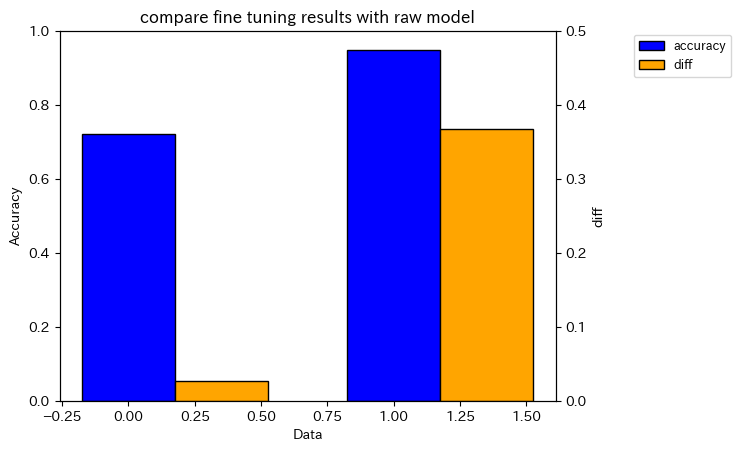

In [ ]:
data1  = [score_before["accuracy"], score_after["accuracy"]]
data2  = [score_before["diff"]    , score_after["diff"]]
labels = ['before', 'after']  # ラベル



f, ax1 = plt.subplots()
ax2    = ax1.twinx()


# 棒グラフの幅
bar_width = 0.35

# X軸の位置
r1 = range(len(data1))
r2 = [x + bar_width for x in r1]

# 棒グラフの描画
ax1.bar(r1, data1, color='blue', width=bar_width, edgecolor='black',   label='accuracy')
ax2.bar(r2, data2, color='orange', width=bar_width, edgecolor='black', label='diff')


# X軸の目盛りとラベル
ax1.set_xlabel('Data')

# Y軸の目盛りとラベル
ax1.set_ylabel("Accuracy")
ax2.set_ylabel("diff")

ax1.set_ylim([0.0, 1.0])
ax2.set_ylim([0.0, 0.5])



# 凡例の表示
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, bbox_to_anchor=(1.15, 1), loc='upper left', borderaxespad=0.3, fontsize=9)

# グラフのタイトル
plt.title('compare fine tuning results with raw model')

# グラフの表示
plt.show()


## t-SNEでファインチューニング前後でモデルが学習できているかどうかを確認する

In [ ]:
# textをベクトル化
def get_vector_and_tsne(df, model, perplexity = 5):
  """
  テキストデータをベクトル化して、それをt-SNEで2次元に圧縮するための関数
  :df    : DataFrame. text(str) カラムを持つDataFrame
  :model : sentence transformers
  :perplexity : perplexity. 一般的には、5～50に設定する
  :return : DataFrame. テキストをベクトル化し、x1 | x2 にそれぞれ格納したDataFrame

  """
  from sklearn.manifold import TSNE

  # t-SNEを定義
  tsne = TSNE(n_components=2, random_state = 0, perplexity = perplexity)

  # 2次元に変換
  X_embedded = tsne.fit_transform(model.encode(df.text.values.tolist()))

  # DataFrameに格納
  df_x_embedded = pd.DataFrame(X_embedded, columns = ["x1", "x2"])

  # オリジナルのDataFrameに結合
  df_result = pd.concat([df, df_x_embedded], axis=1)

  return df_result

In [ ]:
# categoryカラムとtextカラムだけにする
df_vis = df[["category", "text"]]

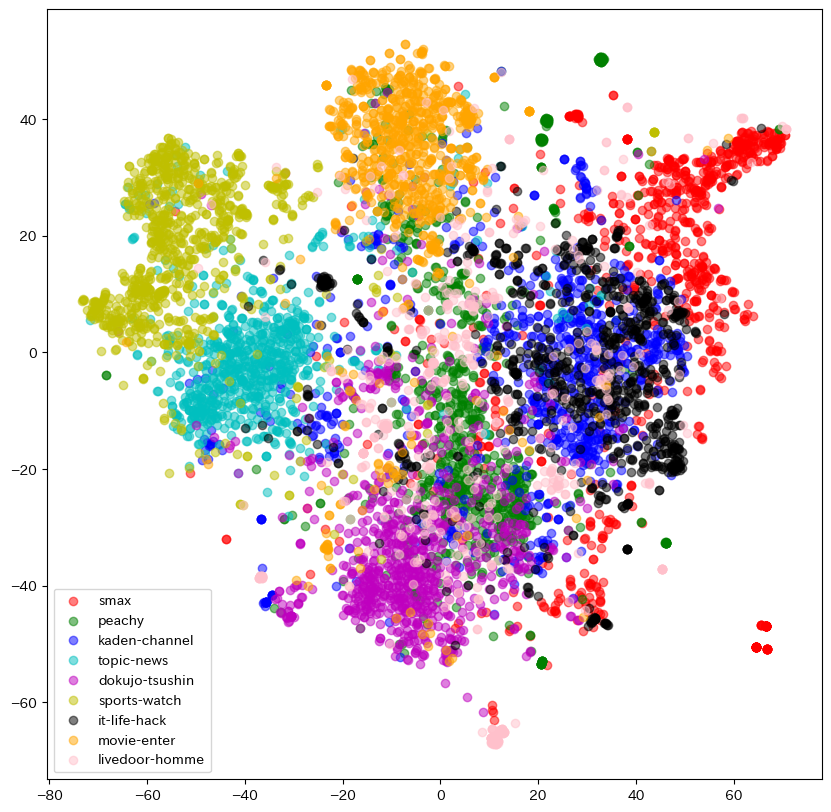

In [ ]:
# ファインチューニング 前

# t-SNEの実行
df_after_tsne = get_vector_and_tsne(df_vis, model_before_fit, perplexity = 50.0)

list_category = df_after_tsne.category.unique()

colors        =  ["r", "g", "b", "c", "m", "y", "k", "orange","pink"]

plt.figure(figsize = (10, 10))

for i , cat in enumerate(list_category):
    tmp_df = df_after_tsne[df_after_tsne.category == cat]

    plt.scatter(tmp_df['x1'],
                tmp_df['x2'],
                color = colors[i],
                alpha=0.5,
                label = cat)
    plt.legend()

In [ ]:
# ファインチューニング 後

# t-SNEの実行
df_after_tsne = get_vector_and_tsne(df_vis, model_after_fit, perplexity = 50.0)

list_category = df_after_tsne.category.unique()

colors        =  ["r", "g", "b", "c", "m", "y", "k", "orange","pink"]

plt.figure(figsize = (10, 10))

for i , cat in enumerate(list_category):
    tmp_df = df_after_tsne[df_after_tsne.category == cat]

    plt.scatter(tmp_df['x1'],
                tmp_df['x2'],
                color = colors[i],
                alpha=0.5,
                label = cat)
    plt.legend()

NameError: ignored